### IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

### LOAD DATASET

In [2]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### EXPLORATORY DATA ANALYSIS

In [3]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
data.duplicated().sum()

0

In [5]:
data.shape

(768, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

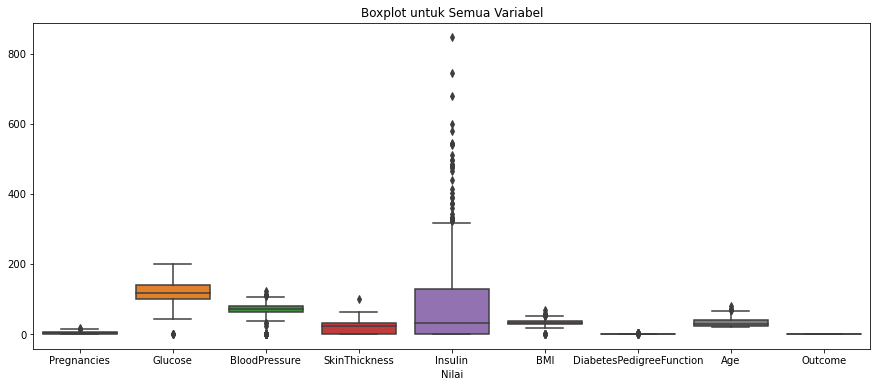

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
sns.boxplot(data=data, orient='v')
plt.title('Boxplot untuk Semua Variabel')
plt.xlabel('Nilai')
plt.show()

In [10]:
def count_outliers(column_data):
    q1 = np.percentile(column_data, 25)
    q3 = np.percentile(column_data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Menghitung jumlah outlier
    outliers = (column_data < lower_bound) | (column_data > upper_bound)
    
    return np.sum(outliers)

# Menghitung jumlah outlier untuk setiap variabel
data_outliers = data.apply(count_outliers)

print("Jumlah outlier untuk setiap variabel:")
print(data_outliers)

Jumlah outlier untuk setiap variabel:
Pregnancies                  4
Glucose                      5
BloodPressure               45
SkinThickness                1
Insulin                     34
BMI                         19
DiabetesPedigreeFunction    29
Age                          9
Outcome                      0
dtype: int64


### PREPROCESSING

In [11]:
# Fungsi untuk menangani outlier dengan truncation
def handle_outliers_truncation(column_data):
    q1 = np.percentile(column_data, 25)
    q3 = np.percentile(column_data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Mengganti nilai outlier dengan batas atas dan bawah
    column_data[column_data < lower_bound] = lower_bound
    column_data[column_data > upper_bound] = upper_bound
    
    return column_data

# Menangani outlier dengan truncation
data_truncated = handle_outliers_truncation(data)

print("Data setelah penanganan outlier dengan truncation:")
data_truncated

Data setelah penanganan outlier dengan truncation:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.000000,72,35,0.000000,33.6,0.627,50,1
1,1,85.000000,66,29,0.000000,26.6,0.351,31,0
2,8,151.806625,64,0,0.000000,23.3,0.672,32,1
3,1,89.000000,66,23,94.000000,28.1,0.167,21,0
4,0,137.000000,40,35,151.806625,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.000000,76,48,151.806625,32.9,0.171,63,0
764,2,122.000000,70,27,0.000000,36.8,0.340,27,0
765,5,121.000000,72,23,112.000000,26.2,0.245,30,0
766,1,126.000000,60,0,0.000000,30.1,0.349,47,1


In [12]:
data_truncated.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

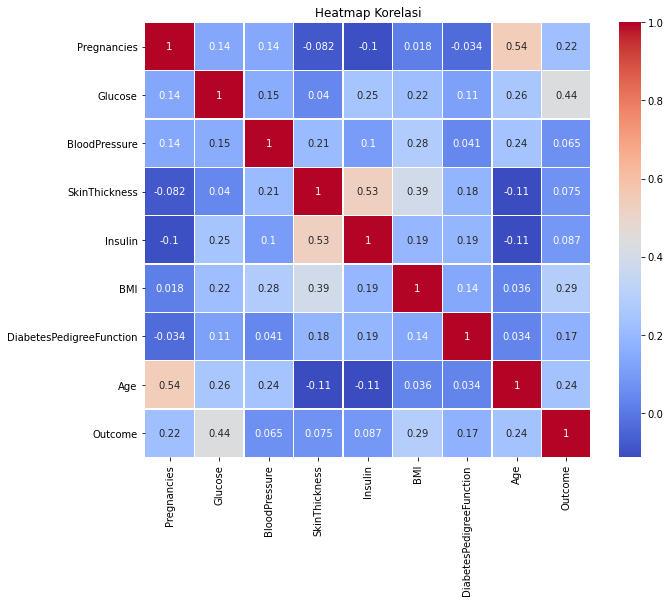

In [13]:
# Menghitung matriks korelasi
correlation_matrix = data_truncated.corr()

# Membuat heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap Korelasi')
plt.show()

In [14]:
# Memisahkan data dan label
X = data_truncated.drop(columns='Outcome', axis=1)
y = data_truncated['Outcome']

In [15]:
# Standarisasi data
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X

array([[ 0.63994726,  1.17821544,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.23969134, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.3243117 , -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.14196968,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.33386704, -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.93265555,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify=y, random_state= 100)

In [17]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


### MODELLING

In [18]:
# Model SVM
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)

X_train_predict = svm_model.predict(X_train)
X_test_predict = svm_model.predict(X_test)

train_data_accuracy = accuracy_score(X_train_predict, y_train)
test_data_accuracy = accuracy_score(X_test_predict, y_test)
print('Akurasi data training adalah = ', train_data_accuracy)
print('Akurasi data testing adalah = ', test_data_accuracy)

Akurasi data training adalah =  0.7671009771986971
Akurasi data testing adalah =  0.7597402597402597


In [19]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=100)
rf_model.fit(X_train, y_train)

X_train_predict_rf = rf_model.predict(X_train)
X_test_predict_rf = rf_model.predict(X_test)

train_data_accuracy_rf = accuracy_score(X_train_predict_rf, y_train)
test_data_accuracy_rf = accuracy_score(X_test_predict_rf, y_test)
print('Akurasi data training (Random Forest) adalah = ', train_data_accuracy_rf)
print('Akurasi data testing (Random Forest) adalah = ', test_data_accuracy_rf)

Akurasi data training (Random Forest) adalah =  1.0
Akurasi data testing (Random Forest) adalah =  0.7792207792207793


In [20]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_

# Evaluasi model terbaik
X_train_predict_best = best_rf_model.predict(X_train)
X_test_predict_best = best_rf_model.predict(X_test)

train_data_accuracy_best = accuracy_score(X_train_predict_best, y_train)
test_data_accuracy_best = accuracy_score(X_test_predict_best, y_test)
print('Akurasi data training (Random Forest - Tuned) adalah = ', train_data_accuracy_best)
print('Akurasi data testing (Random Forest - Tuned) adalah = ', test_data_accuracy_best)

Akurasi data training (Random Forest - Tuned) adalah =  0.9234527687296417
Akurasi data testing (Random Forest - Tuned) adalah =  0.7597402597402597


In [21]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

X_train_predict_dt = dt_model.predict(X_train)
X_test_predict_dt = dt_model.predict(X_test)

train_data_accuracy_dt = accuracy_score(X_train_predict_dt, y_train)
test_data_accuracy_dt = accuracy_score(X_test_predict_dt, y_test)
print('Akurasi data training (Decision Tree) adalah = ', train_data_accuracy_dt)
print('Akurasi data testing (Decision Tree) adalah = ', test_data_accuracy_dt)

Akurasi data training (Decision Tree) adalah =  1.0
Akurasi data testing (Decision Tree) adalah =  0.6753246753246753


In [22]:
# Hyperparameter tuning
param_grid_dt = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'ccp_alpha': [0.0, 0.1, 0.2]
}

grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5)
grid_search_dt.fit(X_train, y_train)

best_dt_model = grid_search_dt.best_estimator_

# Evaluasi model terbaik
X_train_predict_best_dt = best_dt_model.predict(X_train)
X_test_predict_best_dt = best_dt_model.predict(X_test)

train_data_accuracy_best_dt = accuracy_score(X_train_predict_best_dt, y_train)
test_data_accuracy_best_dt = accuracy_score(X_test_predict_best_dt, y_test)
print('Akurasi data training (Decision Tree - Tuned) adalah = ', train_data_accuracy_best_dt)
print('Akurasi data testing (Decision Tree - Tuned) adalah = ', test_data_accuracy_best_dt)

Akurasi data training (Decision Tree - Tuned) adalah =  0.9104234527687296
Akurasi data testing (Decision Tree - Tuned) adalah =  0.7207792207792207


In [23]:
# K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

X_train_predict_knn = knn_model.predict(X_train)
X_test_predict_knn = knn_model.predict(X_test)

train_data_accuracy_knn = accuracy_score(X_train_predict_knn, y_train)
test_data_accuracy_knn = accuracy_score(X_test_predict_knn, y_test)
print('Akurasi data training (KNN) adalah = ', train_data_accuracy_knn)
print('Akurasi data testing (KNN) adalah = ', test_data_accuracy_knn)

Akurasi data training (KNN) adalah =  0.8175895765472313
Akurasi data testing (KNN) adalah =  0.8051948051948052


In [26]:
# Tes dengan input data

input_data = (1, 85, 66, 29, 0, 26.6, 0.351, 31)

input_data_as_numpy_array = np.array(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1, -1) # reshape data

std_data = scaler.transform(input_data_reshape)
std_data

prediction = knn_model.predict(std_data)
print(prediction)

# buat kondisi untuk outputnya
if (prediction[0] == 0):
    print('Pasien tidak terkena diabetes')
else :
    print('Pasien terkena diabetes')

[0]
Pasien tidak terkena diabetes


C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [27]:
# simpan model
import pickle

filename = 'diabetes_model.sav'
pickle.dump(knn_model, open(filename, 'wb'))